# CHURN AND PRICE PREDICTION 

## Problem Statement
The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants me to perform some exploratory data analysis.

* Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
* Historical pricing data: variable and fixed pricing data etc
* Churn indicator: whether each customer has churned or not



## Data Description
* id:                               Client identification number                              
* channel_sales:                    Channel through which sales are made                     
* cons_12m :                        Consistency in 12 months                           
* cons_gas_12m:                     Consistency in gas supply in the last 12 months                       
* cons_last_month:                  How consistent clients are last month                  
* date_activ:                       Active dates                      
* date_end:                         Last contact with client                        
* date_modif_prod:                  Date of modified production                 
* date_renewal :                    Date of possibel renewal of products                     
* forecast_cons_12m :               Forecast of consistency in the last 12 months                
* forecast_cons_year :              Forecast of one year consistency
* forecast_discount_energy:         Forecast of discount energy        
* forecast_meter_rent_12m           Forecast of metered rent in 12 months
* forecast_price_energy_off_peak    Forecast of price energy off the peak
* forecast_price_energy_peak        Forecast of price energy peak
* forecast_price_pow_off_peak       Forecast of price power off the peak
* has_gas                           Gas availability
* imp_cons                          Imp consistency
* margin_gross_pow_ele              Margin gross power of ele
* margin_net_pow_ele                Margin net power of ele
* nb_prod_act                       Notable production act
* net_margin                        Net Margin
* num_years_antig                   Number of years anticipated
* origin_up                         Origin up
* pow_max                           Power maximum
* churn                             Possibility of leaving the product



In [1]:
# importing the necessary libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Enabling visualisation on Jupyter notebook
%matplotlib inline

In [2]:
# Reading the client data and accessing the first five rows
data = pd.read_csv("client_data.csv")
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [3]:
# Reading the price data and accessing the last 10 rows
price = pd.read_csv("price_data.csv")
price.tail(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192992,16f51cdc2baa19af0b940ee1b3dd17d5,2015-03-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192993,16f51cdc2baa19af0b940ee1b3dd17d5,2015-04-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192994,16f51cdc2baa19af0b940ee1b3dd17d5,2015-05-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
192995,16f51cdc2baa19af0b940ee1b3dd17d5,2015-06-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
192996,16f51cdc2baa19af0b940ee1b3dd17d5,2015-07-01,0.128077,0.106401,0.076311,40.728885,24.437330,16.291555
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555


In [4]:
# determining the structure of the client data
data.shape, data.size, data.ndim

((14606, 26), 379756, 2)

## Observation
* There are 14606 rows and 26 columns
* A total of 379756 data on the data set
* A two dimensional dataframe

In [5]:
# determining the structure of the price data
price.shape, price.size, price.ndim

((193002, 8), 1544016, 2)

## Observation
* There are 193002 rows and 8 colums
* The total data on the set sums up to 1544016
* A two dimensional dataframe

In [6]:
# confiming the size of both datas
len(data), len(price)

(14606, 193002)

In [7]:
# understanding the data types of each client column
data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [8]:
# understanding the data types of each price column
price.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [9]:
# Getting deeper info about the client data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
#Getting deeper info about the price data
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
# checking for missing data
data.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [12]:
# checking for missing data
price.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

###### Both datas are well filled up with data. 

### STATISTICAL OVERVIEW for Client data

In [13]:
# Statistical overview of the client data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


## Observations:
#### Understanding what each column represents affected the interpretation of each columns
* cons_12m: 
* cons_gas_12m:
* cons_last_month:
* forecast_cons_12m:	
* forecast_cons_year:
* forecast_discount_energy:
* forecast_meter_rent_12m:
* forecast_price_energy_off_peak:	
* forecast_price_energy_peak:
* forecast_price_pow_off_peak:
* forecast_price_pow_off_peak:
* imp_cons:
* margin_gross_pow_ele:	
* margin_net_pow_ele:
* nb_prod_act:
* net_margin:	
* num_years_antig:
* pow_max:
* churn:


In [14]:
# Statistical overview of object data type for client data 
data.describe(include="object").T

,count,unique,top,freq
id,14606,14606,24011ae4ebbe3035111d65fa7c15bc57,1
channel_sales,14606,8,foosdfpfkusacimwkcsosbicdxkicaua,6754
date_activ,14606,1796,2009-08-01,95
date_end,14606,368,2016-02-01,145
date_modif_prod,14606,2129,2015-11-01,721
date_renewal,14606,386,2015-06-23,587
has_gas,14606,2,f,11955
origin_up,14606,6,lxidpiddsbxsbosboudacockeimpuepw,7097


## Observations:
* id: This repersents the identification of the client and might not add much to the analysis
* channel_sales: There were 8 unique category, foosdfpfkusacimwkcsosbicdxkicaua was the top for channel sales with a freuency of 6754
* date_active: There are 1796 active dates and the most active date is 2009-08-01 occuring 95 times
* date_end: We have 368	unique end dates and 2016-02-01	was top on the list with 145 events
* date_modification_production: 2129 unique date modification production date were on the set with 2015-11-01 as top with 721 occurence
* date_of_renewal: 386 unique renewal dates were seen on the data set with the top date been 2015-06-23 and 587 occurence
* has_gas: it has just two unique entry with f as the most populated with 11955 occurence
* origin_up: 6 unique sets, lxidpiddsbxsbosboudacockeimpuepw as the top most with 7097 occurence
*
*

In [15]:
# Unique values in object data types
for i in data.describe(include="object"):
    print(f"The sum of  values in {i} are:")
    print(f"{pd.unique(data[i])}")
    print("*" * 50)

The sum of  values in id are:
['24011ae4ebbe3035111d65fa7c15bc57' 'd29c2c54acc38ff3c0614d0a653813dd'
 '764c75f661154dac3a6c254cd082ea7d' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
**************************************************
The sum of  values in channel_sales are:
['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
**************************************************
The sum of  values in date_activ are:
['2013-06-15' '2009-08-21' '2010-04-16' ... '2009-04-30' '2013-03-10'
 '2004-12-29']
**************************************************
The sum of  values in date_end are:
['2016-06-15' '2016-08-30' '2016-04-16' '2016-03-30' '2016-03-07'
 '2016-12-09' '2016-12-02' '2016-04-21' '2016-09-23' '2016-05-04'
 '2016-

In [16]:
# confirming both numerical and object datatypes are complete
length = len(data.describe().T) + len(data.describe(include="object").T)
length


26

## Statistical Overview for price data

In [17]:
# Statistical overview of the price data
price.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


## Obervation:
### There were no missing data
* price_off_peak_var: 
* price_peak_var:
* price_mid_peak_var:
* price_off_peak_fix:
* price_peak_fix :
* price_mid_peak_fix:

In [18]:
# Statistical overview of object data type for price data
price.describe(include="object")

,id,price_date
count,193002,193002
unique,16096,12
top,038af19179925da21a25619c5a24b745,2015-08-01
freq,12,16094


## Obervation:
* id:
* price_date:

In [19]:
# confirming both numerical and object datatypes are complete
length2 = len(price.describe().T) + len(price.describe(include="object").T)
length2 

8

In [20]:
len(price.columns), len(data.columns)

(8, 26)

## EDA
Visualising our data with matplotlib:

In [21]:
# numerical columns for client data set
client = ["cons_12m", 'cons_gas_12m',  'cons_last_month' , 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act','net_margin', 'num_years_antig', 'pow_max', 'churn']

In [22]:
import warnings
warnings.filterwarnings("ignore")

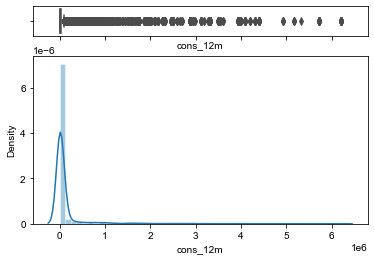

In [23]:
# Visualisation for "cons_12m"
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")
# Add a graph in each part
sns.boxplot(data["cons_12m"], ax=ax_box)
sns.distplot(data["cons_12m"], ax=ax_hist)
ax_box.set(xlabel="cons_12m")
plt.show()

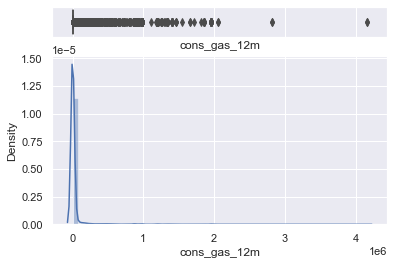

In [24]:
# Visualisation for 'cons_gas_12m'
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")
# Add a graph in each part
sns.boxplot(data['cons_gas_12m'], ax=ax_box)
sns.distplot(data['cons_gas_12m'], ax=ax_hist)
ax_box.set(xlabel='cons_gas_12m')
plt.show()

[Text(0.5, 0, 'forecast_cons_12m')]

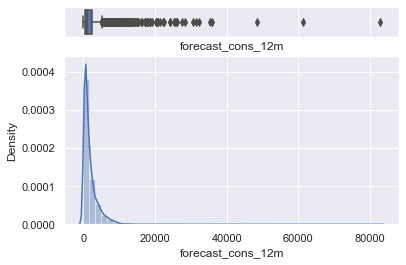

In [25]:
# Visualisation for 'cons_last_month'
# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="ticks")
# Add a graph in each part
sns.boxplot(data["forecast_cons_12m"], ax=ax_box)
sns.distplot(data["forecast_cons_12m"], ax=ax_hist)
ax_box.set(xlabel="forecast_cons_12m")


[Text(0.5, 0, 'forecast_cons_year')]

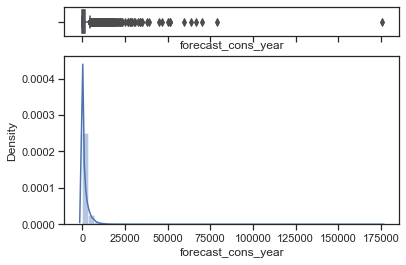

In [26]:
# Visualisation for 'forecast_cons_year''
# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
sns.set(style="whitegrid")
# Add graph in each part
sns.boxplot(data["forecast_cons_year"], ax=ax_box)
sns.distplot(data['forecast_cons_year'], ax=ax_hist)
ax_box.set(xlabel="forecast_cons_year")                                      

[Text(0.5, 0, 'forecast_discount_energy')]

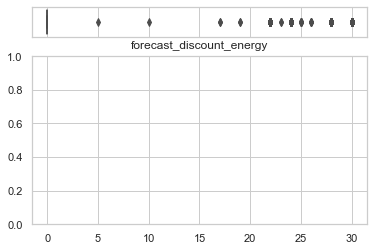

In [27]:
# Visualisation for 'forecast_discount_energy'
# cut window in 2 part
fig, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
sns.set(style="dark")
# Add graph in each part
sns.boxplot(data['forecast_discount_energy'], ax=ax_box)
sns.histplot(data['forecast_discount_energy'], ax=ax_hist)
ax_box.set(xlabel='forecast_discount_energy')

[Text(0.5, 0, 'forecast_meter_rent_12m')]

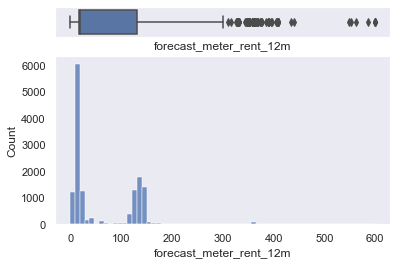

In [28]:
# Visualisation for 'forecast_meter_rent_12m'
# Cut windows into two parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, .85)})
sns.set(style="dark")
# graph in each part
sns.boxplot(data['forecast_meter_rent_12m'], ax=ax_box)
sns.histplot(data['forecast_meter_rent_12m'], ax=ax_hist)
ax_box.set(xlabel='forecast_meter_rent_12m')

[Text(0.5, 0, 'forecast_meter_rent_12m')]

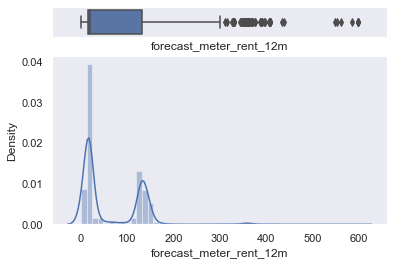

In [29]:
# Visualisation for forecast_meter_rent_12m
# Cut window into two parts
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios" : (.15, .85)})
sns.set(style="whitegrid")
#Add graph in each part
sns.boxplot(data["forecast_meter_rent_12m"], ax=ax1)
sns.distplot(data["forecast_meter_rent_12m"], ax=ax2)
ax1.set(xlabel='forecast_meter_rent_12m')

[Text(0.5, 0, 'forecast_discount_energy')]

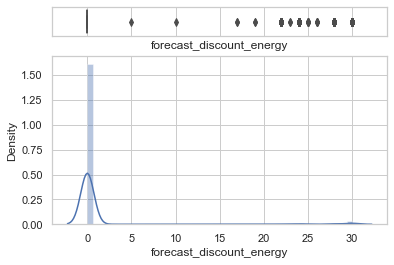

In [30]:
# Visualisation for 'forecast_discount_energy'
# Cut the windows into two parts
fig, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.set(style="dark")
#Add graph in each part
sns.boxplot(data['forecast_discount_energy'], ax=ax_box)
sns.distplot(data['forecast_discount_energy'], ax=ax_dist)
ax_box.set(xlabel='forecast_discount_energy')

In [31]:
data.describe(include="object").columns

Index(['id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'has_gas', 'origin_up'],
      dtype='object')

<AxesSubplot:xlabel='channel_sales', ylabel='churn'>

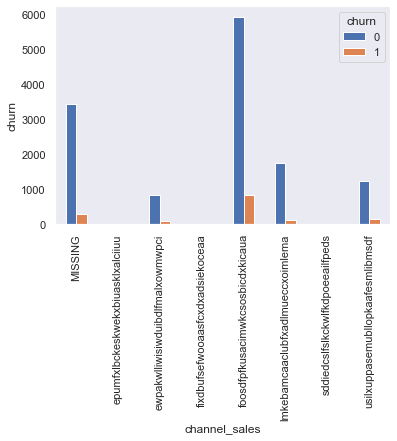

In [32]:
(pd.crosstab(data['channel_sales'], data['churn']).plot(kind="bar", xlabel='channel_sales', ylabel='churn' ))

<AxesSubplot:ylabel='Frequency'>

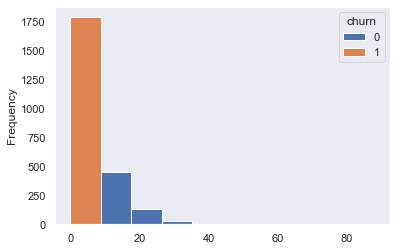

In [33]:
(pd.crosstab(data['date_activ'], data['churn']).plot(kind="hist", xlabel='date_activ', ylabel = "churn"))

<AxesSubplot:ylabel='Frequency'>

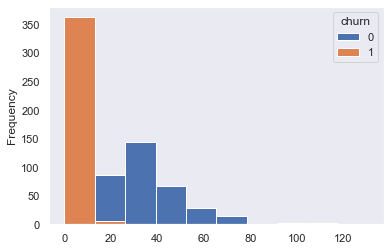

In [34]:
(pd.crosstab(data['date_end'], data['churn']).plot(kind="hist", xlabel='date_end', ylabel="churn" ))

<AxesSubplot:ylabel='Frequency'>

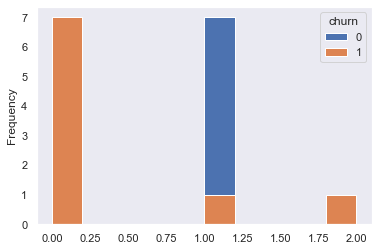

In [35]:
(pd.crosstab(data['date_modif_prod'][:10], data['churn']).plot(kind="hist", xlabel="date_modif_prod", ylabel="churn"))

<AxesSubplot:xlabel='date_renewal', ylabel='churn'>

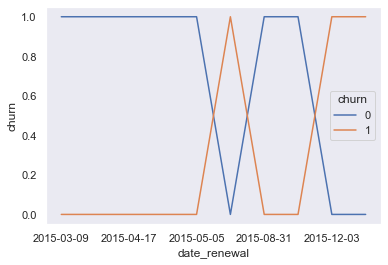

In [36]:
(pd.crosstab(data['date_renewal'][:10], data['churn']).plot(kind="line", xlabel="date_renewal", ylabel="churn"))

<AxesSubplot:xlabel='has_gas', ylabel='churn'>

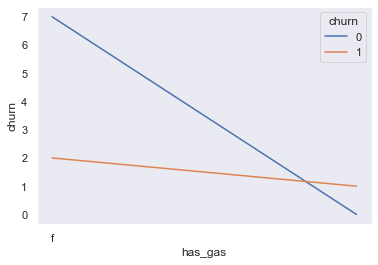

In [37]:
(pd.crosstab(data['has_gas'][:10], data['churn']).plot(kind="line", xlabel='has_gas', ylabel="churn" ))

<AxesSubplot:xlabel='origin_up', ylabel='churn'>

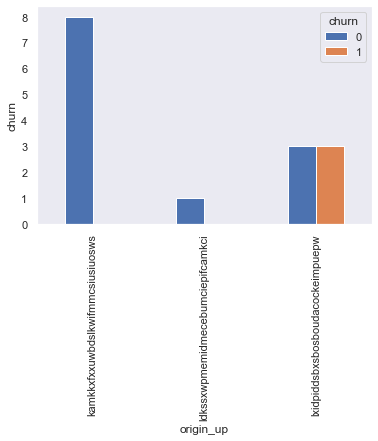

In [38]:
(pd.crosstab(data['origin_up'][:15], data['churn']).plot(kind="bar", xlabel="origin_up", ylabel="churn"))

## Visualising Price data set

In [39]:
# Differentiating numerical columns from object column
price.describe().columns

Index(['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

[Text(0.5, 0, "'price_off_peak_var'")]

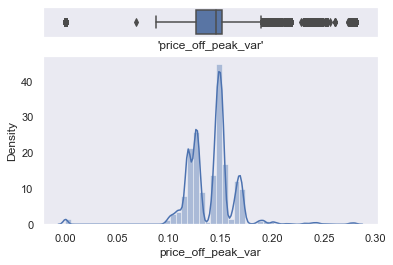

In [40]:
# Visualising for  'price_off_peak_var'
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.set(style="whitegrid")
# Add graph in each part
sns.boxplot(price['price_off_peak_var'], ax=ax_box)
sns.distplot(price['price_off_peak_var'], ax=ax_hist)
ax_box.set(xlabel="'price_off_peak_var'")

[Text(0.5, 0, 'Price peak var')]

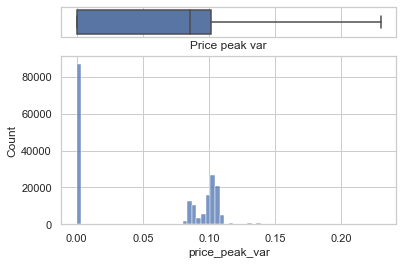

In [41]:
# Visualising for 'price_peak_var'
#  Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.set(style="darkgrid")
# Add graph to each side
sns.boxplot(price['price_peak_var'], ax=ax_box )
sns.histplot(price["price_peak_var"], ax=ax_hist)
ax_box.set(xlabel="Price peak var")

In [42]:
price.describe(include="object").columns

Index(['id', 'price_date'], dtype='object')

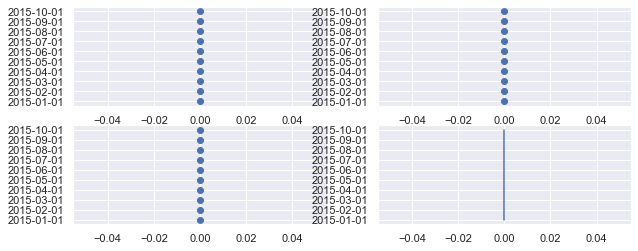

In [54]:
# Visualising for 'price_peak_var'
#  Cut the window in 4 parts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols =2, figsize=(10,4))

# Plot data to each axis
ax1.scatter(price['price_mid_peak_var'][:10], price['price_date'][:10]);
ax2.scatter(price['price_peak_fix'][:10], price['price_date'][:10]);
ax3.scatter(price['price_mid_peak_fix'][:10], price['price_date'][:10]);
ax4.plot(price['price_mid_peak_fix'][:10], price['price_date'][:10]);
      

In [46]:
(pd.crosstab(price['price_date'], price['price_mid_peak_var']))

price_mid_peak_var,0.000000,0.007216,0.012183,0.058456,0.058510,0.061389,0.061443,0.063259,0.063313,0.063679,...,0.099286,0.099635,0.101027,0.101037,0.103097,0.103142,0.103151,0.103502,0.104202,0.114102
price_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,9341,0,1,0,1,0,1,0,1,3,...,0,1,5,0,0,0,0,0,0,1
2015-02-01,9356,0,1,0,1,0,1,0,1,3,...,0,0,2,0,0,0,7,0,0,1
2015-03-01,9371,0,1,0,1,0,1,0,1,3,...,2,0,2,0,0,1,7,0,0,1
2015-04-01,9379,0,1,0,1,0,1,0,1,3,...,5,0,4,10,0,0,7,0,0,0
2015-05-01,9410,0,1,0,1,0,1,0,1,2,...,6,0,1,14,0,0,8,0,0,0
2015-06-01,9531,0,1,0,1,0,1,0,1,2,...,14,0,0,2,0,0,7,0,1,0
2015-07-01,9393,0,0,0,1,0,1,0,1,0,...,26,0,0,0,0,0,8,0,1,0
2015-08-01,9387,0,0,1,0,1,0,1,0,0,...,0,0,0,0,8,0,0,0,0,0
2015-09-01,9422,0,0,1,0,1,0,1,0,0,...,0,0,0,0,8,0,0,0,0,0
